In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimension of X (100, 2)
dimension of Y (100, 1)


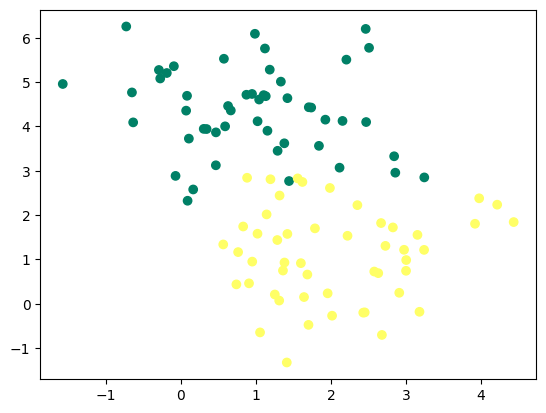

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print('dimension of X', X.shape)
print('dimension of Y', y.shape)

plt.figure()
plt.scatter(X[:,0],X[:,1], c = y, cmap='summer')
plt.show()


In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [4]:
W, b = initialisation(X)

In [5]:
def model(X, W, b):
    Z = X @ W + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [6]:
A = model(X, W, b)
A.shape

(100, 1)

In [7]:
def log_loss(A, y):
    return -1/len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1-A))

In [8]:
log_loss(A, y)

0.8020127751955829

In [9]:
def gradients(A, X, y):
    dWj = 1/len(y) * np.matmul(X.T, A - y) # j stands for Jacobin
    db = 1/len(y) * np.sum(A - y)
    return (dWj, db)


In [10]:
dWj, db = gradients(A, X, y)
print(dWj.shape)
print(db.shape) # real number

(2, 1)
()


In [11]:
def update(dWj, db, W, b, alpha):
    W = W - alpha * dWj
    b = b - alpha * db
    return (W, b)

In [12]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [13]:
def artificial_neuron(X, y, learning_rate = 0.05, n_iter = 400):
    
    # initialisation
    W, b = initialisation(X)
    Loss = []

    # training
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dWj, db = gradients(A,X, y)
        W, b = update(dWj, db, W, b, learning_rate)

    # make some predictions
    y_pred = predict(X, W, b)
    print(accuracy_score(y_pred, y))
    
    plt.figure()
    plt.plot(Loss)
    plt.show

    return (W, b)


0.92
 


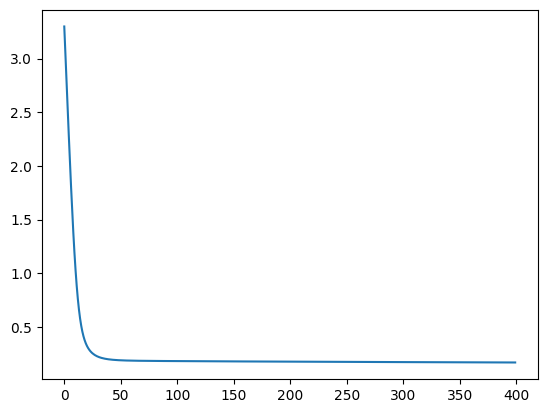

In [14]:
W, b = artificial_neuron(X, y)
print(' ')

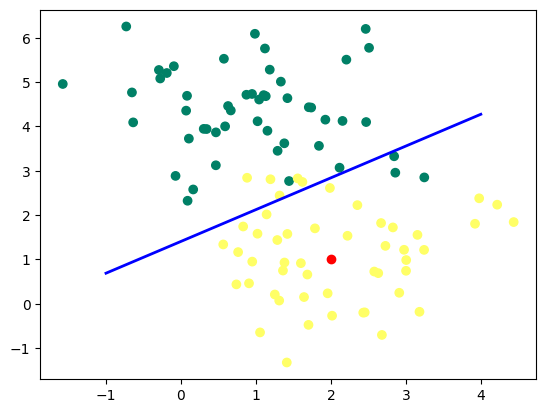

[ True]


In [15]:
plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = (-W[0]*x0-b)/W[1]

plt.figure()
plt.scatter(X[:,0],X[:,1], c = y, cmap='summer')
plt.scatter(plant[0],plant[1], c = 'r')
plt.plot(x0, x1, c='blue', lw=2)
plt.show()

print(predict(plant, W, b))

In [18]:
import plotly.graph_objects as go

In [19]:
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [20]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()